In [1]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

To get the data, enter in the table name from our metadata sheet. 

In [3]:
dfs=api.get_dataframe('dfs_salaries')
dfs.sample(4)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
756,2016,2,Brice Butler,DAL,WR,WAS,0.0,4700.0,0.0,3000.0,0.0,10.0,3105
3776,2016,9,Jakeem Grant,MIA,WR,NYJ,0.0,4500.0,0.0,3000.0,0.0,10.0,8166
5706,2016,14,Bilal Powell,NYJ,RB,SF,32.4,5600.0,37.9,5000.0,32.4,11.0,17627
4371,2016,11,Troymaine Pope,SEA,RB,PHI,0.3,4500.0,0.3,NaN,0.3,NaN,17562


In [4]:
dfs.describe()

,season,week_num,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary
count,7764.000000,7764.000000,7391.000000,7659.000000,6823.000000,7105.000000,6821.000000,6761.000000
mean,2016.048042,8.697579,6.445696,5320.315968,7.461489,3933.258269,6.384730,15.374057
std,0.213869,5.162139,7.014115,1152.770337,8.198509,1496.074587,7.173386,7.424043
min,2016.000000,1.000000,-4.000000,0.000000,-4.000000,2000.000000,-4.000000,10.000000
25%,2016.000000,4.000000,0.600000,4500.000000,0.400000,3000.000000,0.300000,10.000000
50%,2016.000000,9.000000,4.200000,4700.000000,4.900000,3200.000000,4.000000,11.000000
75%,2016.000000,13.000000,10.100000,5900.000000,11.800000,4900.000000,10.100000,19.000000
max,2017.000000,17.000000,49.800000,9700.000000,54.800000,10000.000000,49.800000,42.000000


In [5]:
dfs.groupby(["position"]).agg([max])

,season,week_num,player_name,team_name,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
,max,max,max,max,max,max,max,max,max,max,max,max
position,,,,,,,,,,,,
DST,2017,1,Washington Redskins,WAS,WAS,NaN,5200.0,NaN,3900.0,NaN,NaN,
Def,2016,17,Washington Defense,WAS,WAS,35.00,5400.0,35.00,4100.0,35.00,22.0,
K,2017,1,Zane Gonzalez,WAS,WAS,NaN,6000.0,NaN,NaN,NaN,NaN,9260
PK,2016,17,Wil Lutz,WAS,WAS,23.00,5300.0,NaN,NaN,NaN,NaN,9260
QB,2017,17,Tyrod Taylor,WAS,WAS,37.18,9300.0,40.18,8500.0,37.18,42.0,9897
RB,2017,17,Zach Zenner,WAS,WAS,49.80,9500.0,54.80,9800.0,49.80,42.0,9792
TE,2017,17,Zach Miller,WAS,WAS,32.40,8500.0,41.90,7200.0,32.40,30.0,9743
WR,2017,17,Zay Jones,WAS,WAS,42.00,9700.0,51.00,10000.0,42.00,41.0,9989


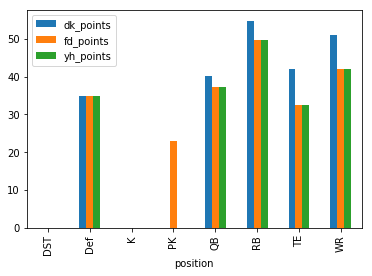

In [6]:
dfs.groupby("position")[['position','dk_points','fd_points','yh_points']].agg(max).plot(kind="bar")

Defaultly, we give you results from 2016-present. To get more data, include a season_start parameter

In [7]:
dfs2014_present=api.get_dataframe('dfs_salaries',season_start=2014)
dfs2014_present.sample(10)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
3233,2014,8,Zach Mettenberger,TEN,QB,HOU,16.86,5200.0,17.86,5000.0,NaN,NaN,14975
20959,2016,15,Dwayne Allen,IND,TE,MIN,1.80,5300.0,2.30,2600.0,1.80,14.0,282
2433,2014,6,Matt Ryan,ATL,QB,CHI,13.74,8700.0,13.74,8600.0,NaN,NaN,19063
2907,2014,7,Brandon Tate,CIN,WR,IND,1.20,5900.0,1.70,3600.0,NaN,NaN,21521
21539,2016,16,Cobi Hamilton,PIT,WR,BAL,1.10,4500.0,1.60,3000.0,1.10,10.0,8767
3610,2014,9,Sebastian Janikowski,OAK,PK,SEA,7.00,4900.0,NaN,NaN,NaN,NaN,10804
16136,2016,4,Brock Osweiler,HOU,QB,TEN,17.56,7300.0,17.56,5800.0,17.56,29.0,16687
5372,2014,13,Tony Romo,DAL,QB,PHI,5.86,8700.0,5.86,7600.0,NaN,NaN,18811
771,2014,2,Dwayne Allen,IND,TE,PHI,0.00,4800.0,0.00,4100.0,NaN,NaN,282
5611,2014,13,Marqueis Gray,BUF,TE,CLE,8.10,4500.0,9.10,3000.0,NaN,NaN,8213


That's it for this guide! Check out some of our other examples like our daily fantasy lineup optimizer or our power rankings example.